In [66]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

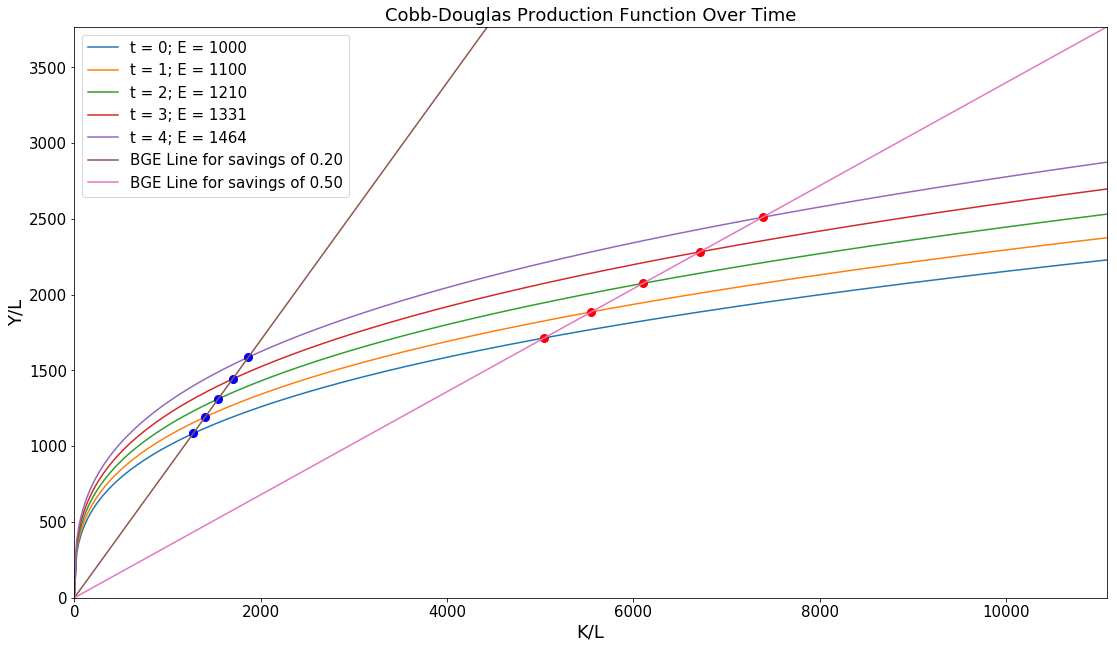

BGE values for savings of 0.2
t	Y/L		K/L		Y/L Growth	K/L Growth
0	1084.65		1276.06		n/a		n/a
1	1193.12		1403.67		0.10		0.10
2	1312.43		1544.03		0.10		0.10
3	1443.67		1698.44		0.10		0.10
4	1588.04		1868.28		0.10		0.10


BGE values for savings of 0.25
t	Y/L		K/L		Y/L Growth	K/L Growth
0	1714.99		5044.08		n/a		n/a
1	1886.48		5548.48		0.10		0.10
2	2075.13		6103.33		0.10		0.10
3	2282.65		6713.67		0.10		0.10
4	2510.91		7385.03		0.10		0.10


In [139]:
k_over_l_values = np.arange(0, 20000, 25)
# number from lecture 2/13
e = 1000
g = .10 # exaggerated for visual effect (according to a 2015 BLS report, growth is at around 0.011)
savings = 0.2
savings_2 = 0.50
depreciation = 0.05
alpha = 1/3
y_over_k = (depreciation + g + n) / savings
y_over_k_2 = (depreciation + g + n) / savings_2

bge_vals = []
bge_vals_2 = []

for i in range(5):
    # graph the production function
    y_over_l_values = k_over_l_values ** alpha * e ** (1-alpha)
    plt.plot(k_over_l_values, y_over_l_values, label = "t = %d; E = %d" % (i,e))
    
    # plot the points on the equilibrium path associated with the particular value of E
    # savings of 0.2
    BGE_y_over_l = (1/y_over_k) ** (alpha / (1-alpha)) * e
    bge_vals.append((BGE_y_over_l, BGE_y_over_l * (1/y_over_k)))
    plt.plot([BGE_y_over_l * (1/y_over_k)], [BGE_y_over_l], marker='o', markersize=8, color="blue")
    # savings of 0.25
    BGE_y_over_l_2 = (1/y_over_k_2) ** (alpha / (1-alpha)) * e
    bge_vals_2.append((BGE_y_over_l_2, BGE_y_over_l_2 * (1/y_over_k_2)))
    plt.plot([BGE_y_over_l_2 * (1/y_over_k_2)], [BGE_y_over_l_2], marker='o', markersize=8, color="red")
    e = e * (1 + g)
plt.plot(k_over_l_values, k_over_l_values * y_over_k, label = "BGE Line for savings of %.2f" % savings)
plt.plot(k_over_l_values, k_over_l_values * y_over_k_2, label = "BGE Line for savings of %.2f" % savings_2)
plt.legend(prop={'size': 15})
plt.xlabel('K/L', fontsize=18)
plt.ylabel('Y/L', fontsize=18)
plt.title('Cobb-Douglas Production Function Over Time', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.axis([0, max(bge_vals + bge_vals_2, key=lambda x: x[1])[1] * 1.5, 
          0, max(bge_vals + bge_vals_2, key=lambda x: x[0])[0] * 1.5])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show(fig)
fig.savefig('prod_func.png', dpi=100)


def print_growth_rates(title, data):
    print(title)
    print("{}\t{}\t\t{}\t\t{}\t{}".format("t", "Y/L", "K/L", "Y/L Growth", 
                                      "K/L Growth"))
    for i in range(len(data)):
        if i > 0:
            print("{}\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(i, data[i][0], data[i][1], (data[i][0] - data[i-1][0]) / data[i-1][0], 
                                         (data[i][1] - data[i-1][1]) / data[i-1][1]))
        else:
            print("{}\t{:.2f}\t\t{:.2f}\t\t{}\t\t{}".format(i, data[i][0], data[i][1], "n/a", "n/a"))

print_growth_rates("BGE values for savings of 0.2", bge_vals)
print("\n")
print_growth_rates("BGE values for savings of 0.25", bge_vals_2)